# KNN Multi-Class (Mask, No Mask, Incorrect Mask)

## Imports

In [11]:
# import packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imutils import paths

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # to plot inage, graph

import pickle
import time # for computation time assessment
%matplotlib inline

## Prepare Dataset

### Pickle Dataset

In [12]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

pickle_in = open("data.pickle", "rb")
data = pickle.load(pickle_in) # Data Matrix will serve as X

### Dataset Classification Distribution

In [13]:
print('# of Samples:', len(y))
print('# of Without A Mask:', (y == 0).sum())
print('# of Incorrectly Worn Mask:', (y == 1).sum())
print('# of With A Mask:', (y == 2).sum())

# of Samples: 17687
# of Without A Mask: 5909
# of Incorrectly Worn Mask: 5895
# of With A Mask: 5883


### Convert Numpy to Dataframe

In [14]:
# Get Column Names
cols = []
for i in range(0, len(data[0])):
    cols.append("P" + str(i))

# Convert to Dataframe
numpy_data = data
X = pd.DataFrame(data=numpy_data, columns=[cols])
print(X.head())

y = pd.DataFrame(data=y, columns=["Mask_Target"])
print(y.head())

    P0   P1   P2   P3   P4   P5   P6   P7   P8   P9  ... P4086 P4087 P4088  \
0   20   21   19   22   29   31   37   51   54   37  ...   132   131   106   
1  127  127  125  126   87   69   34   30   33   37  ...   141   156   156   
2   48   43   37   34   34   40   49   83  100  106  ...    79    58    41   
3  184   91   63   25   14   17   15   35   44   41  ...    84    86    53   
4  111  125  126   97  109  140  168  185  166   91  ...   138    61    27   

  P4089 P4090 P4091 P4092 P4093 P4094 P4095  
0   158   125    43    24    21    21    34  
1   149   150   149   145   125   115   103  
2    21    14    19    22    23    20    21  
3    17    13    13    14    11    13    15  
4    35    30    38    34    45    54    48  

[5 rows x 4096 columns]
   Mask_Target
0            0
1            0
2            0
3            0
4            0


### Data Shape

In [15]:
# Shape
print('\nImage Data Shape:', X.shape)
print('Image Data Shape Features:', data.shape)
print('Image Data Shape Target:', y.shape)


Image Data Shape: (17687, 4096)
Image Data Shape Features: (17687, 4096)
Image Data Shape Target: (17687, 1)


### Normalize the Data

In [16]:
# Normalize the pixel values
X = X / 255.0

### Split Train + Test, random_state

In [17]:
# Split our data into testing and training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Print the length and width of our testing data.
print('Length of our Training data: ',len(X_train), '\nLength of our Testing data: ',len(X_test))

Length of our Training data:  14149 
Length of our Testing data:  3538


## KNN No Hyperparameter Tuning

### Build and train KNN model

In [8]:
# Initialize KNN model
knn = KNeighborsClassifier()

%timeit
# Use training data to fit KNN model
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier()

In [9]:
%%time
# make prediction on entire test data
predictions_set1 = knn.predict(X_test)

CPU times: user 5min, sys: 94.9 ms, total: 5min
Wall time: 5min


In [10]:
pickle_out = open("predictions_set1.pickle", "wb")
pickle.dump(predictions_set1, pickle_out)
pickle_out.close()

## Performance Metrics for No Hyperparameter Tuning

In [31]:
import seaborn as sns # for confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

#### Accuracy

In [12]:
# 75-82% accuracy depending on the divide
print('KNN Accuracy: %.3f' % accuracy_score(y_test, predictions_set1))

KNN Accuracy: 0.758


#### Confusion Matrix

Text(0.5, 1.0, 'Accuracy Score: 0.7577727529677784')

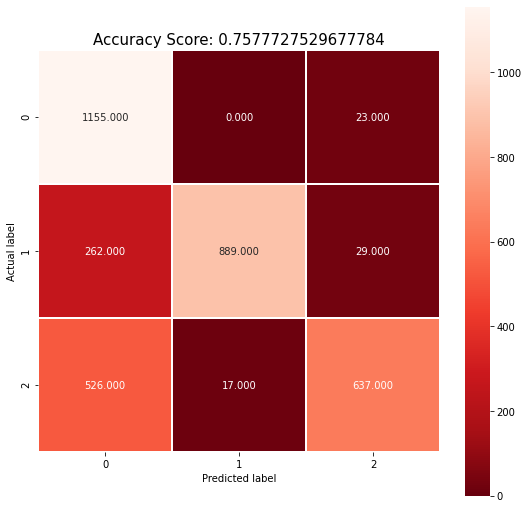

In [13]:
# Calculate Confusion Matrix
cm = confusion_matrix(y_test, predictions_set1)

plt.figure(figsize=(9,9))
# Heatmap visualization of accuracy
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Reds_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, predictions_set1))
plt.title(all_sample_title,size=15)

#### Precision

In [14]:
print('KNN Precision: %.3f' % precision_score(y_test, predictions_set1, average='micro'))

KNN Precision: 0.758


#### Recall

In [15]:
print('KNN Recall: %.3f' % recall_score(y_test, predictions_set1, average='micro'))

KNN Recall: 0.758


#### F1 Score

In [16]:
print('KNN F1 Score: %.3f' % f1_score(y_test, predictions_set1, average='micro'))

KNN F1 Score: 0.758


#### Classification Report

In [17]:
print("\nClassification Report\n", classification_report(y_test, predictions_set1))


Classification Report
               precision    recall  f1-score   support

           0       0.59      0.98      0.74      1178
           1       0.98      0.75      0.85      1180
           2       0.92      0.54      0.68      1180

    accuracy                           0.76      3538
   macro avg       0.83      0.76      0.76      3538
weighted avg       0.83      0.76      0.76      3538



## KNN Hyperparameter Tuning

In [18]:
from sklearn.model_selection import cross_val_score

### GridSearch for Hyperparameter Tuning

In [19]:
from sklearn.model_selection import GridSearchCV

#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': [5, 7, 9, 11], 'p': [2, 4, 6, 8, 10, 20, 50], 'metric': ['manhattan', 'mahalanobis']}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, scoring='f1_micro', cv=5, verbose=3, n_jobs=-1)

In [25]:
#fit model to data
# knn_gscv.fit(X_train, y_train.values.ravel())

In [ ]:
#check top performing n_neighbors, p, and distance values
best_params_ = knn_gscv.best_params_

In [ ]:
#check mean score for the top performing value of n_neighbors, p, and distance
knn_gscv.best_score_

In [30]:
from sklearn.model_selection import RandomizedSearchCV

In [41]:
#Define the parameter values that should be searched
k_range=list(range(1,21))
metric = ['manhattan']
options=['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, metric=metric, weights=options)

In [42]:
#specify "parameter distribution" rather than "parameter grid"
param_dist = dict(n_neighbors=k_range, metric=metric, weights=options)

In [43]:
#n_iter: Number of random combinations it would try
#random_state: Reproducibility/ Set seed

knn_rand=KNeighborsClassifier()
rand = RandomizedSearchCV(knn_rand, param_grid, cv=10, scoring='accuracy', n_iter=10, random_state=5)
rand.fit(X_train, y_train.values.ravel())

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['manhattan'],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19,
                                                        20],
                                        'weights': ['uniform', 'distance']},
                   random_state=5, scoring='accuracy')

In [44]:
rand.best_params_

{'weights': 'distance', 'n_neighbors': 2, 'metric': 'manhattan'}

In [45]:
rand.best_score_

0.8652206356425648

In [ ]:
# Run prediction on best_score

In [ ]:
# Initial Randomized Search CV result
# 0.7488861511088009
# {'weights': 'distance', 'n_neighbors': 10}
# No real change to accuracy from normalizing the datasets

In [2]:
best_params = {'weights': 'distance', 'n_neighbors': 2, 'metric': 'manhattan'}

## Testing for Bias in the POC Dataset

In [7]:
best_params = {'weights': 'distance', 'n_neighbors': 2, 'metric': 'manhattan'}

In [18]:
# create new a knn model with best params
b_knn = KNeighborsClassifier(**best_params)

#fit model to data
b_knn.fit(X_train, y_train)

# make prediction on entire test data
predictions_set2 = b_knn.predict(X_test)

<ipython-input-18-3de682915620>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  b_knn.fit(X_train, y_train)


In [28]:
pickle_in = open("X_test_POC.pickle", "rb")
poc_X = pickle.load(pickle_in)

pickle_in = open("y_test_POC.pickle", "rb")
poc_y = pickle.load(pickle_in)

print("Features, poc_X shape: ", poc_X.shape)
print("Target, poc_y shape: ", poc_y.shape)

# Shape
print('\nImage Data Shape:', poc_X.shape)
print('Image Data Shape Target:', poc_y.shape)

# Normalize the pixel values
poc_X = poc_X / 255.0

Features, poc_X shape:  (309, 4096)
Target, poc_y shape:  (309,)

Image Data Shape: (309, 4096)
Image Data Shape Target: (309,)


In [29]:
# make prediction on entire poc test data
predictions_set2_poc = b_knn.predict(poc_X)

Text(0.5, 1.0, 'Accuracy Score: 0.8640474844544941')

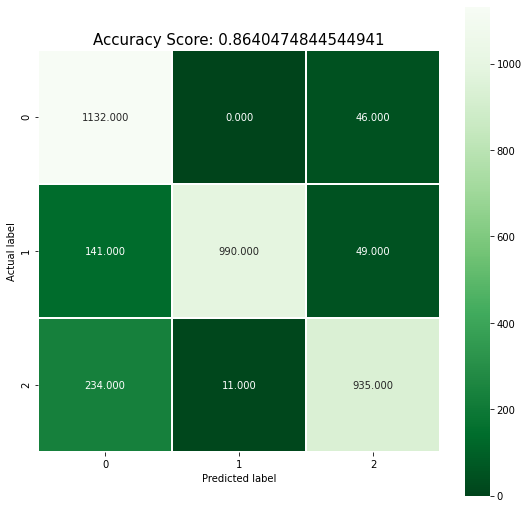

In [34]:
# Calculate Confusion Matrix
cm = confusion_matrix(y_test, predictions_set2)

plt.figure(figsize=(9,9))
# Heatmap visualization of accuracy
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Greens_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, predictions_set2))
plt.title(all_sample_title,size=15)

Text(0.5, 1.0, 'Accuracy Score: 0.5016181229773463')

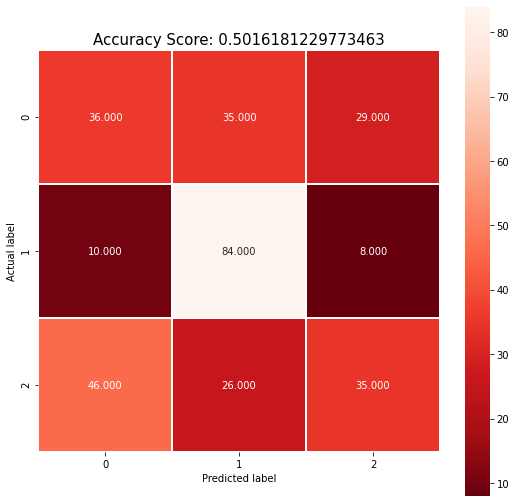

In [35]:
# Calculate Confusion Matrix
cm = confusion_matrix(poc_y, predictions_set2_poc)

plt.figure(figsize=(9,9))
# Heatmap visualization of accuracy
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Reds_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(poc_y, predictions_set2_poc))
plt.title(all_sample_title,size=15)

In [32]:
print("\nClassification Report Best Params\n", classification_report(y_test, predictions_set2))
print("\nClassification Report POC Test Dataset\n", classification_report(poc_y, predictions_set2_poc))


Classification Report Best Params
               precision    recall  f1-score   support

           0       0.75      0.96      0.84      1178
           1       0.99      0.84      0.91      1180
           2       0.91      0.79      0.85      1180

    accuracy                           0.86      3538
   macro avg       0.88      0.86      0.87      3538
weighted avg       0.88      0.86      0.87      3538


Classification Report POC Test Dataset
               precision    recall  f1-score   support

           0       0.39      0.36      0.37       100
           1       0.58      0.82      0.68       102
           2       0.49      0.33      0.39       107

    accuracy                           0.50       309
   macro avg       0.49      0.50      0.48       309
weighted avg       0.49      0.50      0.48       309



### Performance Metrics on Best Params

In [ ]:
# Calculate Confusion Matrix
cm = confusion_matrix(y_test, predictions_set2)

plt.figure(figsize=(9,9))
# Heatmap visualization of accuracy
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Greens_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, predictions_set2))
plt.title(all_sample_title,size=15)

print('KNN Precision: %.3f' % precision_score(y_test, predictions_set2, average='micro'))
print('KNN Recall: %.3f' % recall_score(y_test, predictions_set2, average='micro'))
print('KNN F1 Score: %.3f' % f1_score(y_test, predictions_set2, average='micro'))
print("\nClassification Report\n", classification_report(y_test, predictions_set2))

### Saving & Exporting KNN model for future use

In [ ]:
# NAME OF MODEL
filename = 'knn-face-mask-detection-model.pkl'

# EXPORT AND SAVE MODEL 
pickle.dump(knn2, open(filename, 'wb'))